Stage-Structure Population Model
- Using a real world example to model stages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

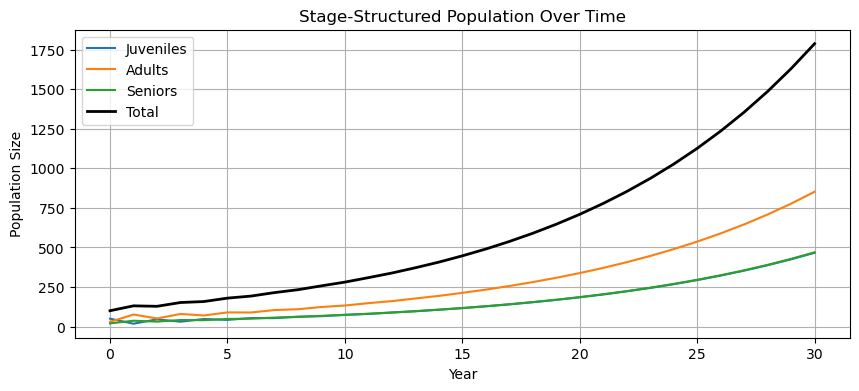

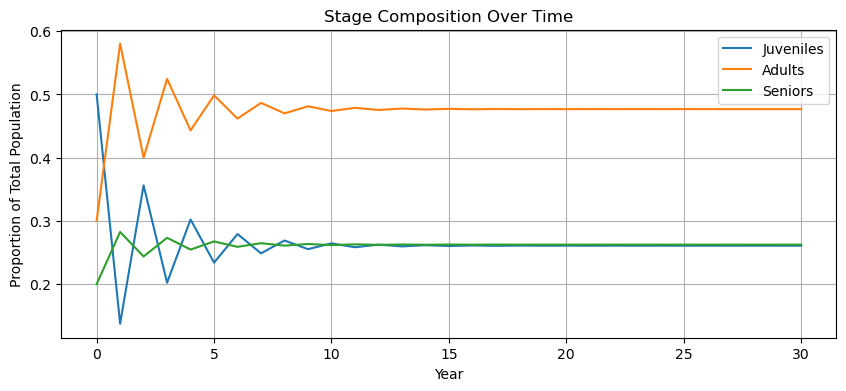

(array([ 50.        ,  18.        ,  45.6       ,  30.72      ,
         47.808     ,  42.048     ,  53.75232   ,  53.346816  ,
         62.636544  ,  65.67118848,  74.2584361 ,  79.81210092,
         88.74446635,  96.45377274, 106.44435604, 116.27439246,
        127.88544746, 140.01151468, 153.75974763, 168.51013324,
        184.93088741, 202.76395683, 222.45466746, 243.95611901,
        267.61035226, 293.50332089, 321.94187132, 353.1063262 ,
        387.30930546, 424.80929884, 465.9518646 ]),
 array([ 30.        ,  76.        ,  51.2       ,  79.68      ,
         70.08      ,  89.5872    ,  88.91136   , 104.39424   ,
        109.4519808 , 123.76406016, 133.02016819, 147.90744392,
        160.7562879 , 177.40726007, 193.79065409, 213.14241243,
        233.35252447, 256.26624604, 280.85022206, 308.21814569,
        337.93992806, 370.75777909, 406.59353168, 446.01725377,
        489.17220149, 536.56978553, 588.51054366, 645.51550909,
        708.01549807, 776.58644101, 851.78404547]),


In [19]:
def stage_population(years, initial_juvenile, initial_adult, initial_senior):
     
    # Matrix representing stage transitions and fecundity
    A = np.array([
        [0, 1.2, 0.5],   # Reproduction rates
        [0.6, 0, 0],     # Juvenile survival to adult
        [0, 0.8, 0.6]    # Adult survival to senior and senior survival
    ])

    # Initial stage population vector
    initial_population_vector = np.array([initial_juvenile, initial_adult, initial_senior])

    # Lists to store results
    total_population = []
    juvenile_population = []
    adult_population = []
    senior_population = []

    # Append initial values
    juvenile_population.append(initial_population_vector[0])
    adult_population.append(initial_population_vector[1])
    senior_population.append(initial_population_vector[2])
    total_population.append(sum(initial_population_vector))

    # Simulation loop
    n_t = initial_population_vector
    for year in range(years):
        n_t = np.dot(n_t, A)
        juvenile_population.append(n_t[0])
        adult_population.append(n_t[1])
        senior_population.append(n_t[2])
        total_population.append(sum(n_t))

    # Convert to numpy arrays
    juvenile_population = np.array(juvenile_population)
    adult_population = np.array(adult_population)
    senior_population = np.array(senior_population)
    total_population = np.array(total_population)

    # Plot population by stage
    plt.figure(figsize=(10, 4))
    plt.plot(range(years + 1), juvenile_population, label="Juveniles")
    plt.plot(range(years + 1), adult_population, label="Adults")
    plt.plot(range(years + 1), senior_population, label="Seniors")
    plt.plot(range(years + 1), total_population, label="Total", color='black', linewidth=2)
    plt.xlabel("Year")
    plt.ylabel("Population Size")
    plt.title("Stage-Structured Population Over Time")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate stage percentages
    juvenile_percent = juvenile_population / total_population
    adult_percent = adult_population / total_population
    senior_percent = senior_population / total_population

    # Plot percentage composition
    plt.figure(figsize=(10, 4))
    plt.plot(range(years + 1), juvenile_percent, label="Juveniles")
    plt.plot(range(years + 1), adult_percent, label="Adults")
    plt.plot(range(years + 1), senior_percent, label="Seniors")
    plt.xlabel("Year")
    plt.ylabel("Proportion of Total Population")
    plt.title("Stage Composition Over Time")
    plt.legend()
    plt.grid(True)
    plt.show()

    return juvenile_population, adult_population, senior_population, total_population

# Example run
stage_population(30, 50, 30, 20)


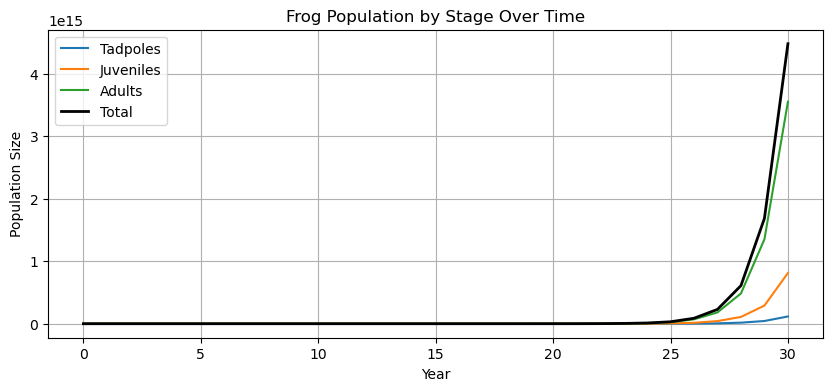

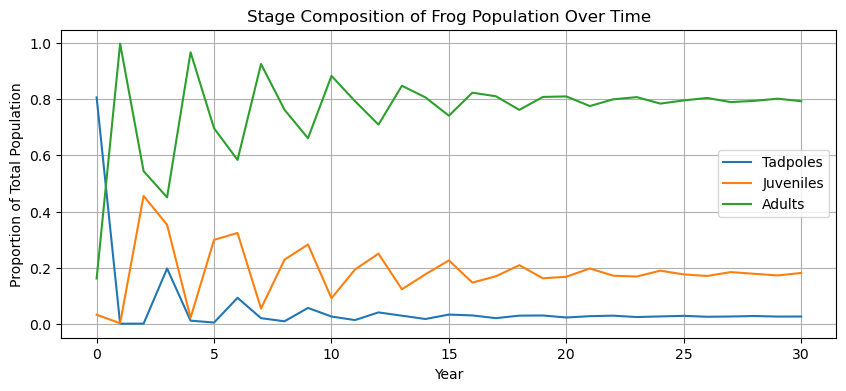

(array([5.00000000e+01, 8.00000000e-01, 2.40000000e+00, 7.21680000e+02,
        5.16696000e+02, 3.96247200e+02, 1.06695650e+04, 1.49091179e+04,
        1.61423422e+04, 1.64941376e+05, 3.30150261e+05, 4.63554911e+05,
        2.69964425e+06, 6.64391474e+06, 1.13259310e+07, 4.68030290e+07,
        1.28434493e+08, 2.52997552e+08, 8.51061904e+08, 2.44520003e+09,
        5.35480476e+09, 1.60036547e+10, 4.64134387e+10, 1.09598596e+11,
        3.07171645e+11, 8.83373669e+11, 2.19658135e+12, 5.96087864e+12,
        1.68931959e+13, 4.34560085e+13, 1.16255858e+14]),
 array([2.00000000e+00, 6.00000000e+00, 1.80420000e+03, 1.29174000e+03,
        9.90618000e+02, 2.66739126e+04, 3.72727948e+04, 4.03558556e+04,
        4.12353440e+05, 8.25375654e+05, 1.15888728e+06, 6.74911064e+06,
        1.66097869e+07, 2.83148276e+07, 1.17007572e+08, 3.21086231e+08,
        6.32493879e+08, 2.12765476e+09, 6.11300006e+09, 1.33870119e+10,
        4.00091369e+10, 1.16033597e+11, 2.73996489e+11, 7.67929113e+11,
      

In [25]:
def frog_population(years, initial_tadpole, initial_juvenile, initial_adult):
     
    # Matrix representing transitions and fecundity
    A = np.array([
        [0, 0, 60],    # Adults produce new tadpoles
        [0.4, 0, 0],    # Tadpoles surviving to juveniles
        [0, 0.6, 0.7]   # Juveniles to adults and adult survival
    ])

    # Initial population vector
    initial_population_vector = np.array([initial_tadpole, initial_juvenile, initial_adult])

    # Lists to store populations
    total_population = []
    tadpole_population = []
    juvenile_population = []
    adult_population = []

    # Append initial values
    tadpole_population.append(initial_population_vector[0])
    juvenile_population.append(initial_population_vector[1])
    adult_population.append(initial_population_vector[2])
    total_population.append(sum(initial_population_vector))

    # Simulation loop
    n_t = initial_population_vector
    for year in range(years):
        n_t = np.dot(n_t, A)
        tadpole_population.append(n_t[0])
        juvenile_population.append(n_t[1])
        adult_population.append(n_t[2])
        total_population.append(sum(n_t))

    # Convert to arrays
    tadpole_population = np.array(tadpole_population)
    juvenile_population = np.array(juvenile_population)
    adult_population = np.array(adult_population)
    total_population = np.array(total_population)

    # Plot population by stage
    plt.figure(figsize=(10, 4))
    plt.plot(range(years + 1), tadpole_population, label="Tadpoles")
    plt.plot(range(years + 1), juvenile_population, label="Juveniles")
    plt.plot(range(years + 1), adult_population, label="Adults")
    plt.plot(range(years + 1), total_population, label="Total", color='black', linewidth=2)
    plt.xlabel("Year")
    plt.ylabel("Population Size")
    plt.title("Frog Population by Stage Over Time")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate stage percentages
    tadpole_percent = tadpole_population / total_population
    juvenile_percent = juvenile_population / total_population
    adult_percent = adult_population / total_population

    # Plot stage composition
    plt.figure(figsize=(10, 4))
    plt.plot(range(years + 1), tadpole_percent, label="Tadpoles")
    plt.plot(range(years + 1), juvenile_percent, label="Juveniles")
    plt.plot(range(years + 1), adult_percent, label="Adults")
    plt.xlabel("Year")
    plt.ylabel("Proportion of Total Population")
    plt.title("Stage Composition of Frog Population Over Time")
    plt.legend()
    plt.grid(True)
    plt.show()

    return tadpole_population, juvenile_population, adult_population, total_population

# Example run
frog_population(30, 50, 2, 10)


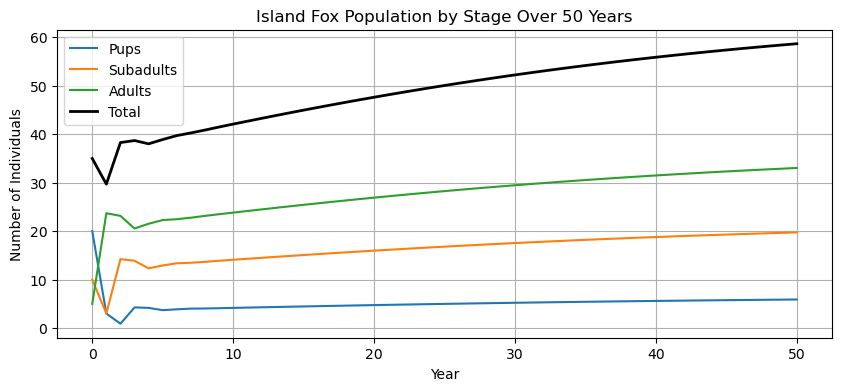

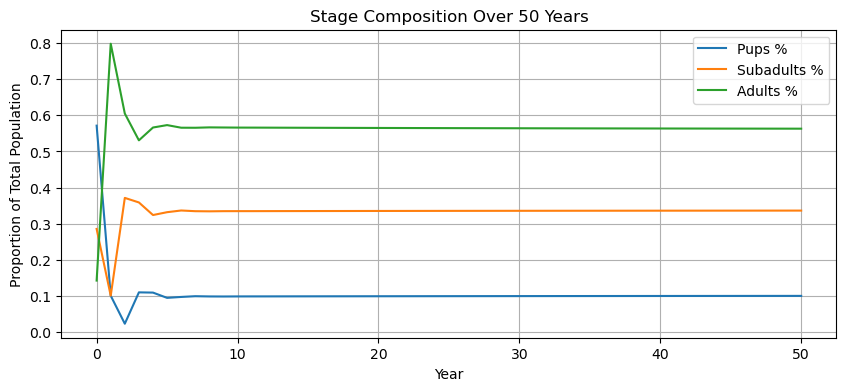

(array([20.        ,  3.        ,  0.9       ,  4.2677027 ,  4.16842033,
         3.69803006,  3.87606749,  4.0129343 ,  4.04523635,  4.1003768 ,
         4.16863524,  4.23000689,  4.28926604,  4.34897477,  4.40789156,
         4.46574982,  4.52276674,  4.57892397,  4.63416259,  4.68847178,
         4.74184261,  4.79426056,  4.84571424,  4.89619519,  4.94569639,
         4.99421246,  5.04173973,  5.0882762 ,  5.13382134,  5.1783761 ,
         5.2219428 ,  5.26452509,  5.30612783,  5.34675704,  5.38641983,
         5.42512431,  5.46287954,  5.49969544,  5.53558271,  5.57055282,
         5.60461786,  5.63779056,  5.67008417,  5.70151243,  5.73208952,
         5.76182997,  5.79074866,  5.81886073,  5.84618155,  5.87272669,
         5.89851185]),
 array([10.        ,  3.        , 14.22567568, 13.89473443, 12.32676687,
        12.92022495, 13.37644766, 13.48412117, 13.66792266, 13.8954508 ,
        14.10002295, 14.29755348, 14.49658258, 14.69297187, 14.88583274,
        15.07588914, 15.2630

In [29]:
def island_fox_population(years=50, initial_pups=20, initial_subadults=10, initial_adults=5,
                           F0_adult=1.2, K=150):
    # Survival and progression rates
    s_pup_to_sub = 0.30
    s_sub_to_adult = 0.60
    s_adult_survive = 0.85

    # Initial population vector
    n_t = np.array([initial_pups, initial_subadults, initial_adults], dtype=float)

    # Lists to store populations
    pups = []
    subadults = []
    adults = []
    total = []

    # Record initial population
    pups.append(n_t[0])
    subadults.append(n_t[1])
    adults.append(n_t[2])
    total.append(n_t.sum())

    for year in range(years):
        total_now = n_t.sum()
        # Density-dependent fecundity using Beverton-Holt form
        fecundity = F0_adult / (1.0 + total_now / K)

        # Transition matrix
        A = np.array([
            [0.0, 0.0, fecundity],       # Adults produce new pups
            [s_pup_to_sub, 0.0, 0.0],    # Pups to subadults
            [0.0, s_sub_to_adult, s_adult_survive]  # Subadults to adults, adults survive
        ])

        # Update population
        n_t = np.dot(n_t, A)

        # Store results
        pups.append(n_t[0])
        subadults.append(n_t[1])
        adults.append(n_t[2])
        total.append(n_t.sum())

    # Convert to arrays
    pups = np.array(pups)
    subadults = np.array(subadults)
    adults = np.array(adults)
    total = np.array(total)
    years_axis = np.arange(years + 1)

    # Plot population by stage and total
    plt.figure(figsize=(10, 4))
    plt.plot(years_axis, pups, label="Pups")
    plt.plot(years_axis, subadults, label="Subadults")
    plt.plot(years_axis, adults, label="Adults")
    plt.plot(years_axis, total, label="Total", color="black", linewidth=2)
    plt.xlabel("Year")
    plt.ylabel("Number of Individuals")
    plt.title("Island Fox Population by Stage Over 50 Years")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot stage proportions
    pct_pups = pups / total
    pct_sub = subadults / total
    pct_adults = adults / total

    plt.figure(figsize=(10, 4))
    plt.plot(years_axis, pct_pups, label="Pups %")
    plt.plot(years_axis, pct_sub, label="Subadults %")
    plt.plot(years_axis, pct_adults, label="Adults %")
    plt.xlabel("Year")
    plt.ylabel("Proportion of Total Population")
    plt.title("Stage Composition Over 50 Years")
    plt.legend()
    plt.grid(True)
    plt.show()

    return pups, subadults, adults, total

# Example run
island_fox_population()


The real world examples looked at human, frogs, and island fox population.

After 50 years the population is growing, however the population for the frogs grew exponentially and regardless of what variables I manipluated the graph remained the same do to the shear size of the populaiton.

Looking at the fox population model, it is transiant up until roughly year 5 and 6. By the time it reaches year 10 it for sure has reached stability in population growth.